In [ ]:
pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 33.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import plotly.express as px
from stable_baselines3 import A2C, DDPG
import gym
from sklearn.metrics import mean_squared_error

In [ ]:
world_energy_df = pd.read_csv('/content/World Energy Consumption.csv')
energy_consumption_df = pd.read_csv('/content/Energy_consumption.csv')
nuclear_energy_df = pd.read_csv('/content/power_plant_database_global.csv')

<ipython-input-3-ac6692985bd6>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  nuclear_energy_df = pd.read_csv('/content/power_plant_database_global.csv')


In [ ]:
# Feature Engineering
# Extract relevant columns and derive new features
energy_data = world_energy_df[['country', 'year', 'fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption']]
nuclear_data = nuclear_energy_df[['country', 'capacity_mw', 'primary_fuel']]
energy_data['total_energy_consumption'] = energy_data[['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption']].sum(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-4-ca9f038cc3e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data['total_energy_consumption'] = energy_data[['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption']].sum(axis=1)


In [ ]:
# Calculating new features for clustering
energy_data['renewables_share_elec'] = energy_data['renewables_consumption'] / energy_data['total_energy_consumption']
energy_data['nuclear_share_energy'] = energy_data['nuclear_consumption'] / energy_data['total_energy_consumption']
data = pd.merge(energy_data, nuclear_data, on='country', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-5def9259f6f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data['renewables_share_elec'] = energy_data['renewables_consumption'] / energy_data['total_energy_consumption']
<ipython-input-5-5def9259f6f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
data = pd.merge(energy_data, nuclear_data, on='country', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.merge(energy_data, nuclear_data, on='country', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 2: Data Cleaning
# Dropping rows with missing values in essential columns
data.dropna(subset=['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption'], inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Scaling data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption', 'renewables_share_elec', 'nuclear_share_energy']])


In [ ]:
# Step 3: Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualizing Clusters
fig = px.scatter(data, x='renewables_share_elec', y='nuclear_share_energy', color='cluster', hover_data=['country'])
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



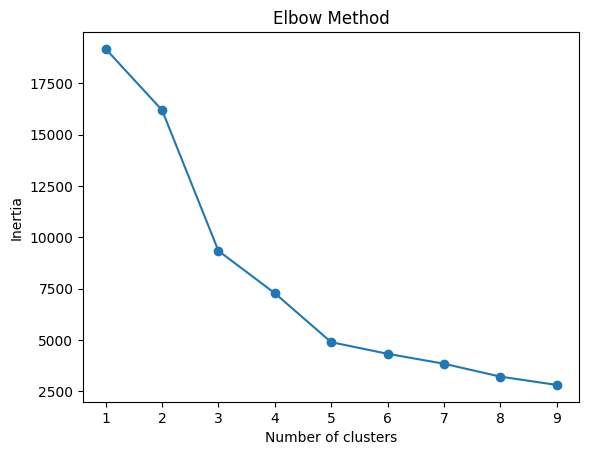

In [ ]:
# Elbow method
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Silhouette score
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(f"For n_clusters = {i}, the average silhouette score is : {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



For n_clusters = 2, the average silhouette score is : 0.3513948222389523
For n_clusters = 3, the average silhouette score is : 0.4535077496770872
For n_clusters = 4, the average silhouette score is : 0.48073124198772144
For n_clusters = 5, the average silhouette score is : 0.5297654929159971
For n_clusters = 6, the average silhouette score is : 0.5184573851661148
For n_clusters = 7, the average silhouette score is : 0.5231388898866106
For n_clusters = 8, the average silhouette score is : 0.5280859912900308
For n_clusters = 9, the average silhouette score is : 0.5287008697841641


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
fig = px.scatter(data, x='renewables_share_elec', y='nuclear_share_energy', color='cluster', hover_data=['country'])
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['country'] = data['country']  # Adding the country column
pca_df['cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(pca_data)

# Visualize the clusters
fig = px.scatter(pca_df, x='PCA1', y='PCA2', color=pca_df['cluster'].astype(str), hover_data=['country'])
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Step 4: Predictive Modeling (LSTM for time-series forecasting)
# Preparing data for the LSTM model
cluster_data = data[data['cluster'] == 0].sort_values(by='year')  # Sort by time
X = cluster_data[['fossil_fuel_consumption', 'nuclear_consumption']]
y = cluster_data['renewables_consumption']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(pca.components_)

[[ 0.58797279  0.55814867  0.57869757 -0.03952815  0.07940214]
 [-0.12200624  0.09455315 -0.0469615   0.51897335  0.83942567]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
feature_names = ['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption', 'renewables_share_elec', 'nuclear_share_energy']
loadings_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PCA1', 'PCA2'])
print(loadings_df)

      fossil_fuel_consumption  nuclear_consumption  renewables_consumption  \
PCA1                 0.587973             0.558149                0.578698   
PCA2                -0.122006             0.094553               -0.046962   

      renewables_share_elec  nuclear_share_energy  
PCA1              -0.039528              0.079402  
PCA2               0.518973              0.839426  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



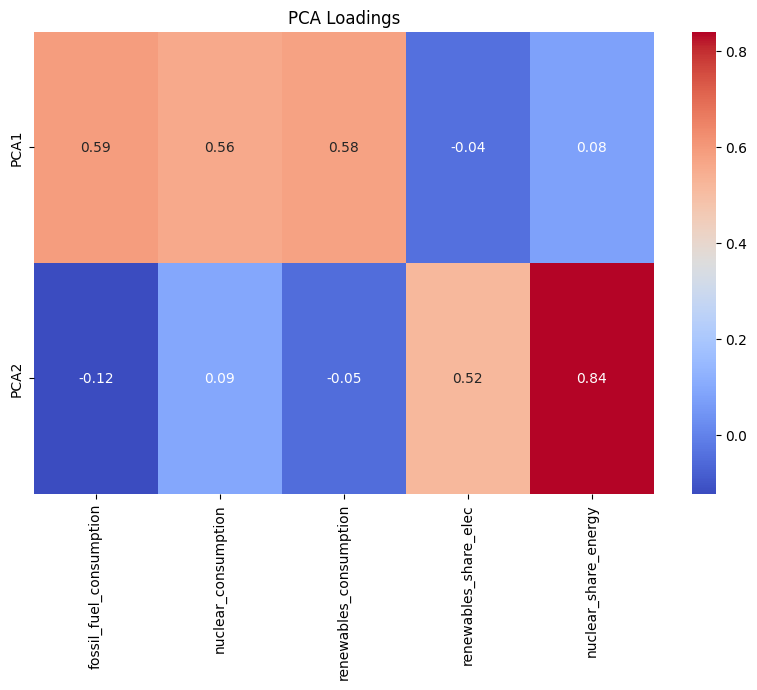

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('PCA Loadings')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



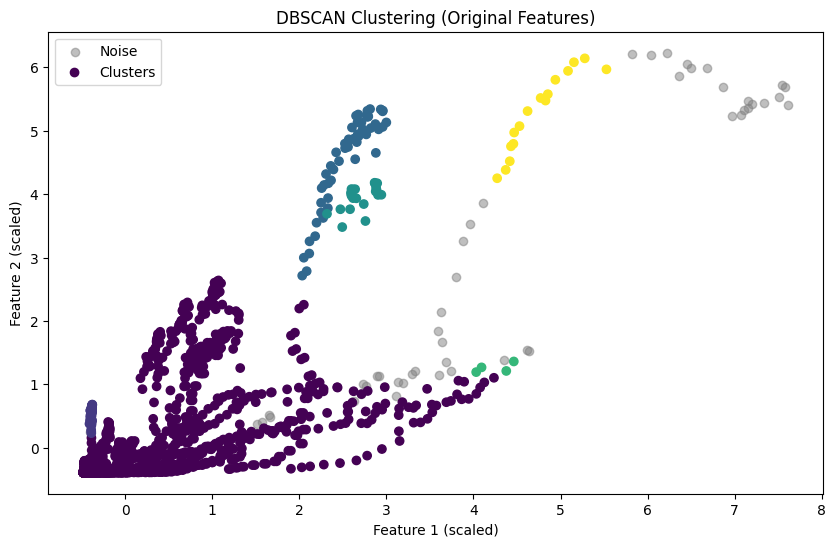

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
data['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Separate noise points for visualization
filtered_data = data[data['dbscan_cluster'] != -1]  # Exclude noise points (dbscan_cluster = -1)

# Scatter plot of DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[data['dbscan_cluster'] == -1, 0], scaled_data[data['dbscan_cluster'] == -1, 1],
            c='grey', label='Noise', alpha=0.5)
plt.scatter(scaled_data[data['dbscan_cluster'] != -1, 0], scaled_data[data['dbscan_cluster'] != -1, 1],
            c=data['dbscan_cluster'][data['dbscan_cluster'] != -1], cmap='viridis', label='Clusters')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('DBSCAN Clustering (Original Features)')
plt.legend()
plt.show()

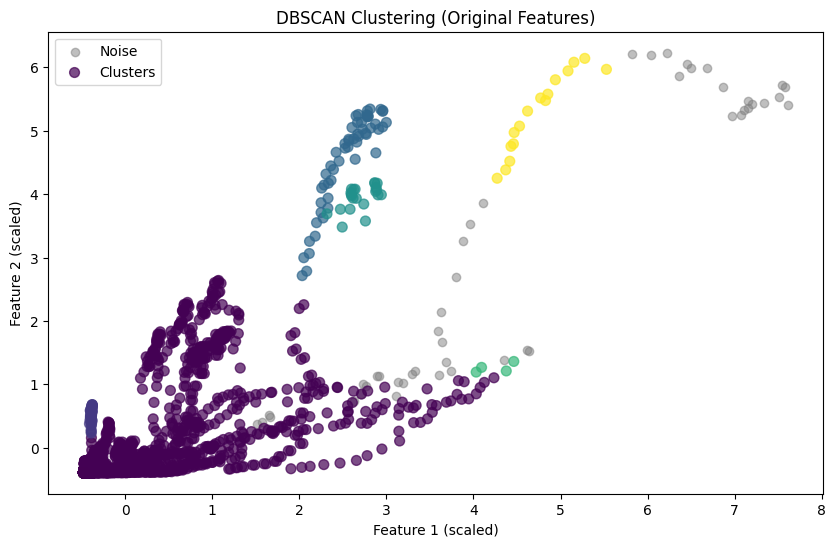

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define custom colors for clusters
colors = mcolors.TABLEAU_COLORS.values()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
data['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Plot DBSCAN results
plt.figure(figsize=(10, 6))

# Separate noise and clusters for visualization
# Noise points are labeled as -1 in DBSCAN
plt.scatter(scaled_data[data['dbscan_cluster'] == -1, 0],
            scaled_data[data['dbscan_cluster'] == -1, 1],
            c='grey', label='Noise', alpha=0.5)

# Plot clusters (excluding noise)
plt.scatter(scaled_data[data['dbscan_cluster'] != -1, 0],
            scaled_data[data['dbscan_cluster'] != -1, 1],
            c=data['dbscan_cluster'][data['dbscan_cluster'] != -1],
            cmap='viridis', label='Clusters', s=50, alpha=0.7)

# Labels and title
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('DBSCAN Clustering (Original Features)')
plt.legend()
plt.show()

In [ ]:
print(data.columns)
print(scaled_data.shape)

Index(['country', 'year', 'fossil_fuel_consumption', 'nuclear_consumption',
       'renewables_consumption', 'total_energy_consumption',
       'renewables_share_elec', 'nuclear_share_energy', 'capacity_mw',
       'primary_fuel', 'cluster', 'dbscan_cluster'],
      dtype='object')
(3836, 5)


In [ ]:
print(data[['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption',
            'renewables_share_elec', 'nuclear_share_energy']].head())

     fossil_fuel_consumption  nuclear_consumption  renewables_consumption  \
210                  675.202                  0.0                  41.119   
211                  704.270                  0.0                  45.863   
212                  710.059                  0.0                  47.876   
213                  744.596                  0.0                  56.000   
214                  757.316                  0.0                  65.352   

     renewables_share_elec  nuclear_share_energy  
210               0.057403                   0.0  
211               0.061140                   0.0  
212               0.063166                   0.0  
213               0.069948                   0.0  
214               0.079439                   0.0  


In [ ]:
scaled_df_all = pd.DataFrame(scaled_data, columns=[f'Feature {i+1} (scaled)' for i in range(scaled_data.shape[1])])
print(scaled_df_all.head())

   Feature 1 (scaled)  Feature 2 (scaled)  Feature 3 (scaled)  \
0           -0.439010           -0.393159           -0.407748   
1           -0.437296           -0.393159           -0.405198   
2           -0.436955           -0.393159           -0.404116   
3           -0.434919           -0.393159           -0.399748   
4           -0.434169           -0.393159           -0.394721   

   Feature 4 (scaled)  Feature 5 (scaled)  
0           -0.416010           -0.630707  
1           -0.382502           -0.630707  
2           -0.364329           -0.630707  
3           -0.303518           -0.630707  
4           -0.218409           -0.630707  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



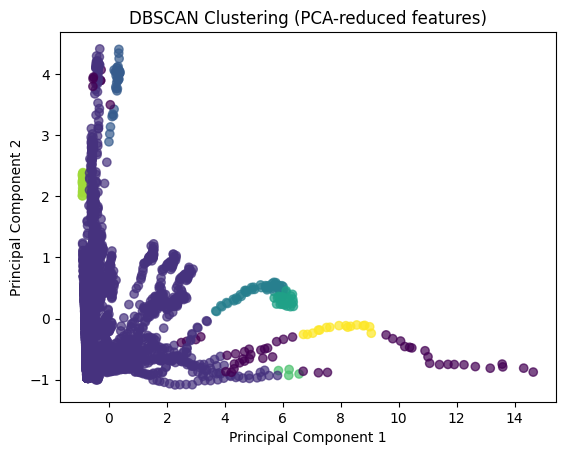

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Scatter plot of PCA-reduced features
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['dbscan_cluster'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (PCA-reduced features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<ipython-input-33-04059a168cca>:9: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



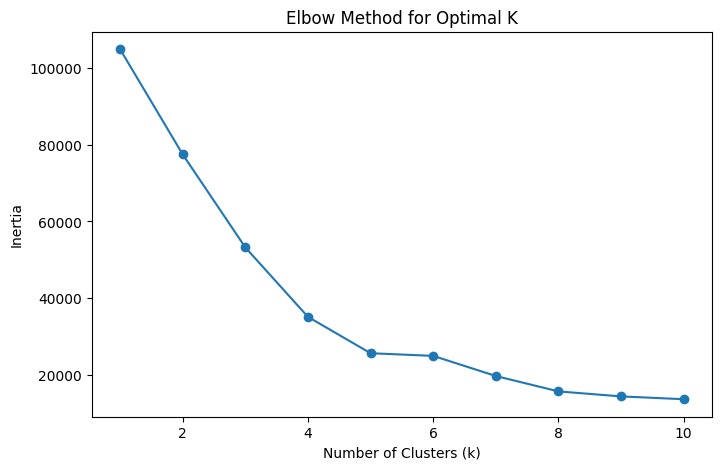

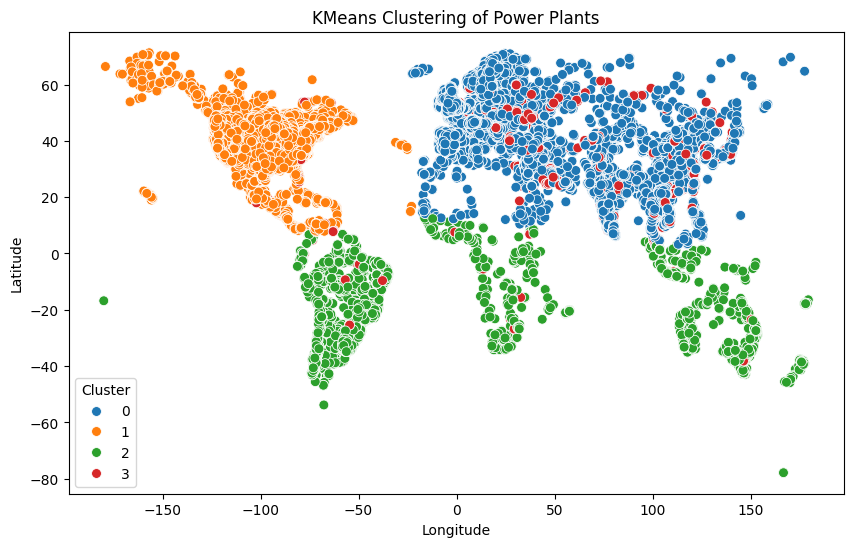

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
power_plant_data = pd.read_csv('power_plant_database_global.csv')

# Select relevant features for clustering
features = ['latitude', 'longitude', 'capacity_mw']
data = power_plant_data[features]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_clean = pd.DataFrame(imputer.fit_transform(data), columns=features)

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans with an optimal k (choose from Elbow plot)
optimal_k = 4  # Example based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
power_plant_data['Cluster'] = clusters

# Visualize the clusters (latitude vs. longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=power_plant_data['longitude'],
    y=power_plant_data['latitude'],
    hue=power_plant_data['Cluster'],
    palette='tab10',
    s=50
)
plt.title('KMeans Clustering of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

# Save the clustered data
power_plant_data.to_csv('power_plant_clusters.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Load the datasets
energy_consumption_path = '/content/Energy_consumption.csv'
world_energy_path = '/content/World Energy Consumption.csv'

In [ ]:
# Read the files into dataframes
energy_consumption_df = pd.read_csv(energy_consumption_path)
world_energy_df = pd.read_csv(world_energy_path)

In [ ]:
# ---------------------- EDA ----------------------
# Quick summary of missing values
missing_energy_consumption = energy_consumption_df.isnull().sum()
missing_world_energy = world_energy_df.isnull().sum()

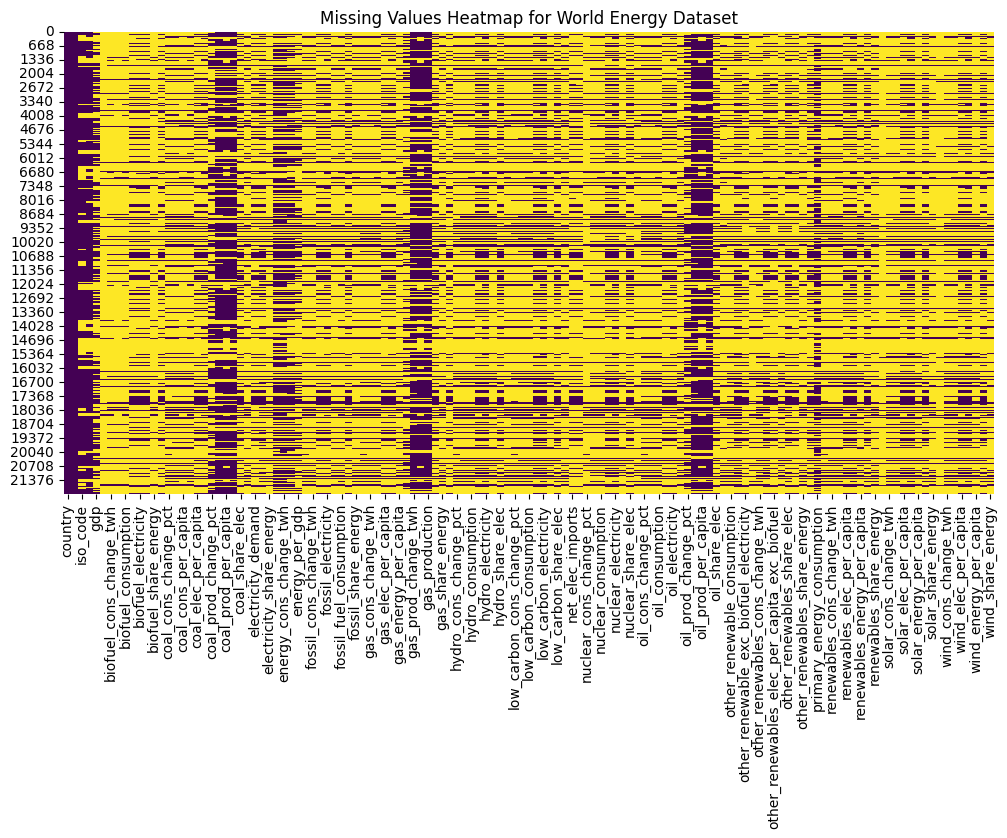

In [ ]:
# Heatmap to visualize missing data in world energy dataset
plt.figure(figsize=(12, 6))
sns.heatmap(world_energy_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap for World Energy Dataset")
plt.show()


In [ ]:

# Correlation heatmap for Energy Consumption dataset (numerical columns only)
plt.figure(figsize=(10, 6))
correlation_matrix = energy_consumption_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Energy Consumption Dataset")
plt.show()

ValueError: could not convert string to float: '2022-01-01 00:00:00'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Parse the Timestamp column into datetime format
energy_consumption_df["Timestamp"] = pd.to_datetime(energy_consumption_df["Timestamp"])

# Extract useful components from the timestamp
energy_consumption_df["Year"] = energy_consumption_df["Timestamp"].dt.year
energy_consumption_df["Month"] = energy_consumption_df["Timestamp"].dt.month
energy_consumption_df["Day"] = energy_consumption_df["Timestamp"].dt.day
energy_consumption_df["Hour"] = energy_consumption_df["Timestamp"].dt.hour
energy_consumption_df["DayOfWeek"] = energy_consumption_df["Timestamp"].dt.dayofweek

# Drop the original Timestamp column (if not needed)
energy_consumption_df = energy_consumption_df.drop(columns=["Timestamp"])

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = energy_consumption_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Energy Consumption Dataset")
plt.show()

ValueError: could not convert string to float: 'On'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Check for non-numeric columns
non_numeric_cols = energy_consumption_df.select_dtypes(include=["object"]).columns
print("Non-Numeric Columns:", non_numeric_cols)

# Preview unique values in these columns
for col in non_numeric_cols:
    print(f"Unique values in {col}: {energy_consumption_df[col].unique()}")

# Convert categorical data
# Example: Label encoding for binary columns like 'On'/'Off'
for col in non_numeric_cols:
    if len(energy_consumption_df[col].unique()) == 2:  # Binary column
        energy_consumption_df[col] = energy_consumption_df[col].map({"On": 1, "Off": 0})

# For multi-class columns, use one-hot encoding
energy_consumption_df = pd.get_dummies(energy_consumption_df, columns=non_numeric_cols)


Non-Numeric Columns: Index(['HVACUsage', 'LightingUsage', 'Holiday'], dtype='object')
Unique values in HVACUsage: ['On' 'Off']
Unique values in LightingUsage: ['Off' 'On']
Unique values in Holiday: ['No' 'Yes']


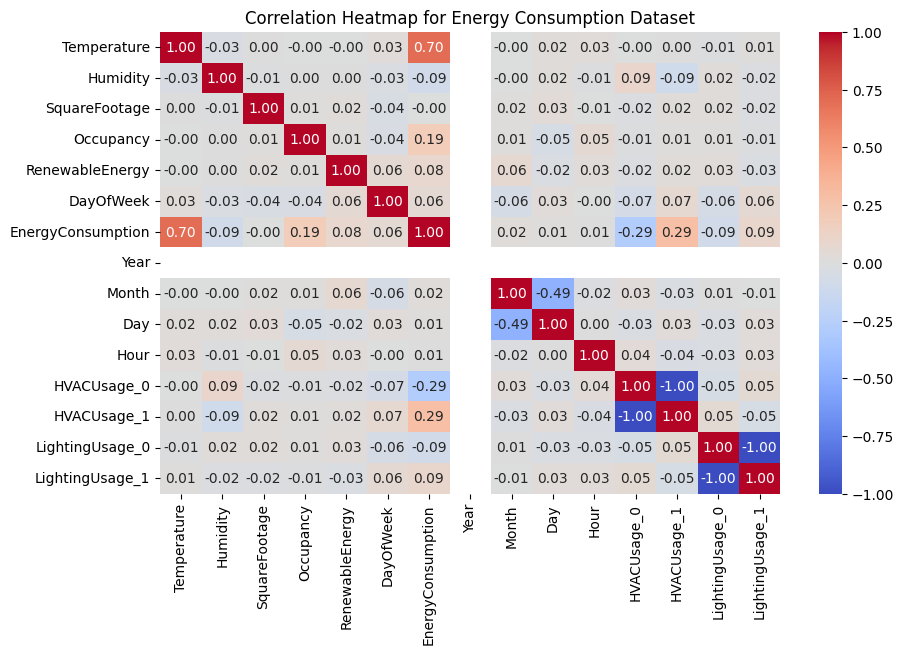

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = energy_consumption_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Energy Consumption Dataset")
plt.show()

In [ ]:
# ---------------------- Linear Regression on Energy Consumption Dataset ----------------------
# Preprocessing
energy_features = energy_consumption_df[["Temperature", "Humidity", "SquareFootage", "Occupancy", "RenewableEnergy"]]
energy_target = energy_consumption_df["EnergyConsumption"]


In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(energy_features, energy_target, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions and evaluation
y_pred = linear_reg.predict(X_test)
mse_energy = mean_squared_error(y_test, y_pred)
r2_energy = r2_score(y_test, y_pred)

In [ ]:
# Results
energy_model_results = {
    "Coefficients": linear_reg.coef_,
    "Intercept": linear_reg.intercept_,
    "Mean Squared Error": mse_energy,
    "R2 Score": r2_energy
}

In [ ]:
# Displaying results
print("Energy Consumption Dataset Results:")
print(energy_model_results)

Energy Consumption Dataset Results:
{'Coefficients': array([ 1.98538118e+00, -6.39092250e-02, -5.82431499e-04,  4.88579667e-01,
        9.85460181e-02]), 'Intercept': 27.516620263645507, 'Mean Squared Error': 33.05972041231882, 'R2 Score': 0.4952704849998406}


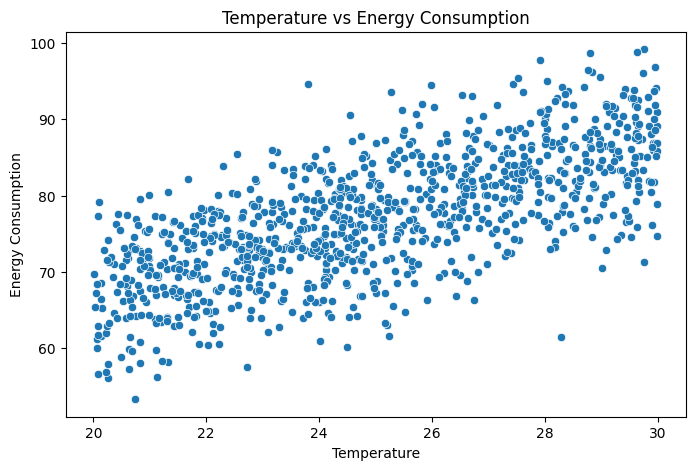

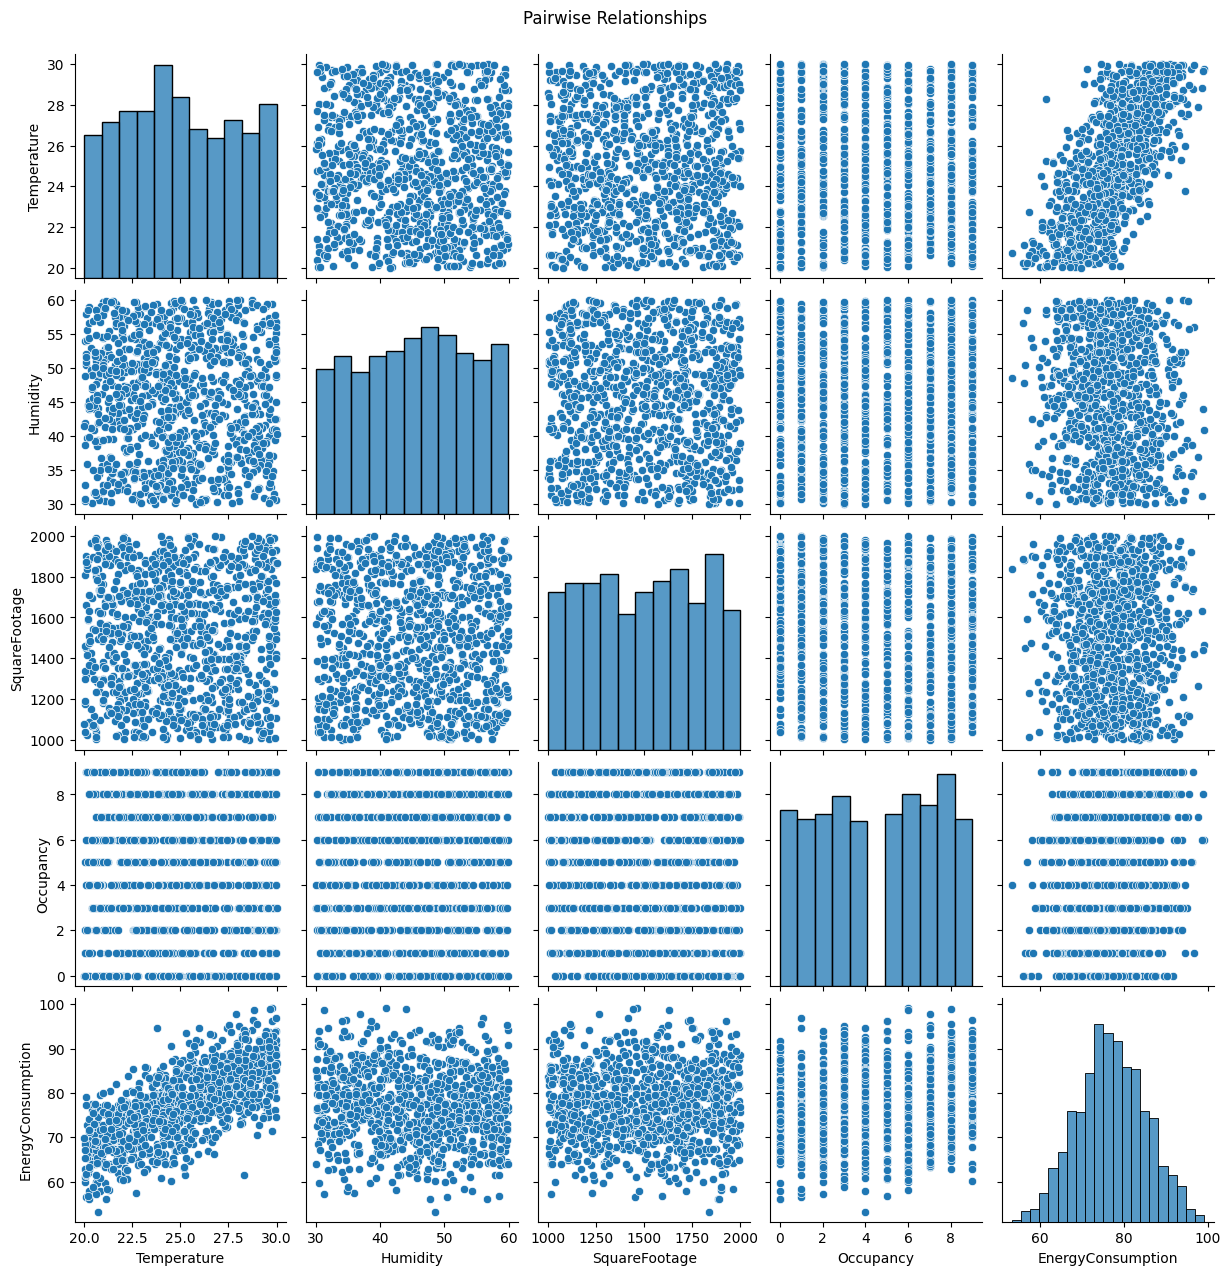

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Temperature vs EnergyConsumption
plt.figure(figsize=(8, 5))
sns.scatterplot(x=energy_consumption_df["Temperature"], y=energy_consumption_df["EnergyConsumption"])
plt.title("Temperature vs Energy Consumption")
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.show()

# Pairplot for selected features
selected_features = ["Temperature", "Humidity", "SquareFootage", "Occupancy", "EnergyConsumption"]
sns.pairplot(energy_consumption_df[selected_features])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

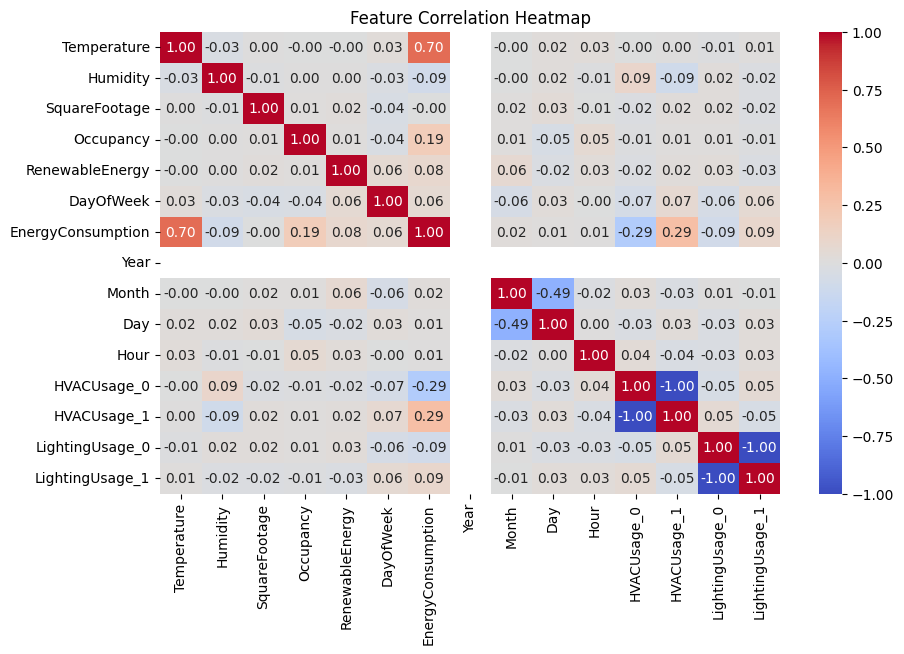

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(energy_consumption_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-43-da741c8dcfa1>:7: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



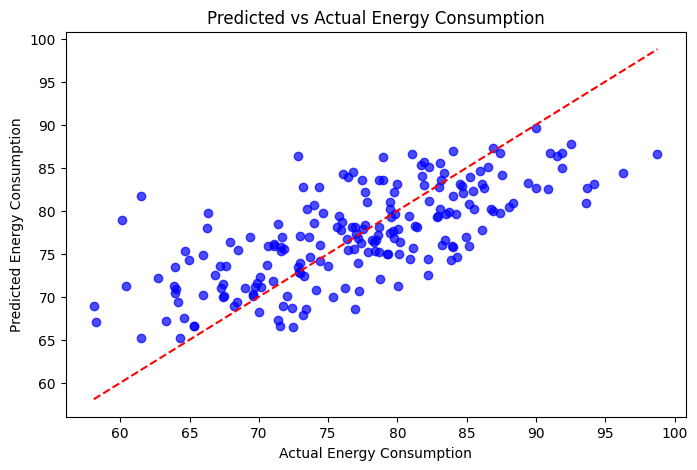

In [ ]:
# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title("Predicted vs Actual Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')  # Diagonal line
plt.show()

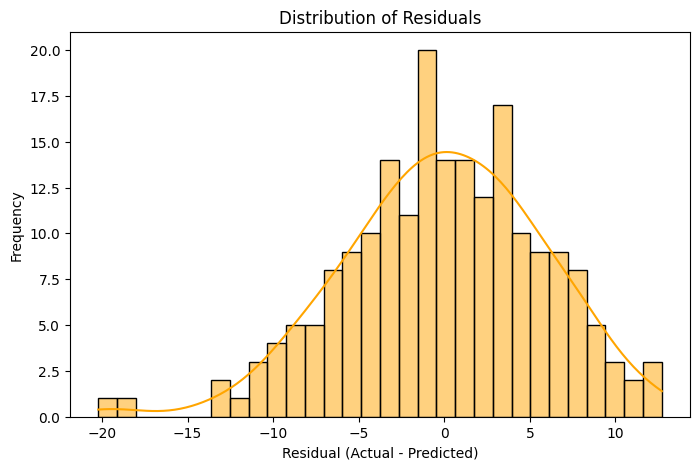

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="orange")
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

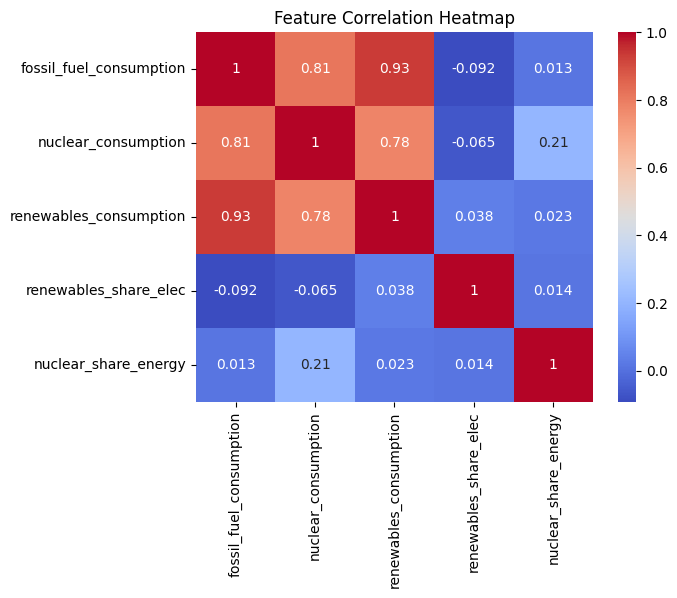

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption',
                    'renewables_share_elec', 'nuclear_share_energy']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Selecting features for DBSCAN
selected_features = scaled_data[['renewables_consumption', 'renewables_share_elec', 'nuclear_share_energy']]

# Applying DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(selected_features)

# Adding cluster labels to the DataFrame
scaled_df['dbscan_cluster'] = clusters

# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(selected_features.iloc[:, 0], selected_features.iloc[:, 1],
            c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Renewables Consumption')
plt.ylabel('Renewables Share in Electricity')
plt.title('DBSCAN Clustering with Selected Features')
plt.colorbar(label='Cluster Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



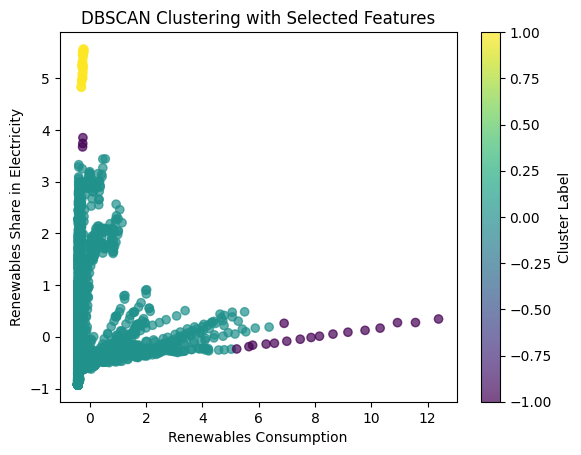

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame with the raw data
features = ['fossil_fuel_consumption', 'nuclear_consumption', 'renewables_consumption',
            'renewables_share_elec', 'nuclear_share_energy']

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Convert scaled_data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Selecting features for DBSCAN
selected_features = scaled_df[['renewables_consumption', 'renewables_share_elec', 'nuclear_share_energy']]

# Apply DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(selected_features)

# Add clusters to the DataFrame
scaled_df['dbscan_cluster'] = clusters

# Visualize the clustering results
import matplotlib.pyplot as plt

plt.scatter(selected_features.iloc[:, 0], selected_features.iloc[:, 1],
            c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Renewables Consumption')
plt.ylabel('Renewables Share in Electricity')
plt.title('DBSCAN Clustering with Selected Features')
plt.colorbar(label='Cluster Label')
plt.show()